# Data Management in Python Using Standard Tooling

Prior to beginning the tutorial, please install the following packages via `pip`:
 - pandas
 - matplotlib
 - statsmodels
 - seaborn
 - openpyxl
 - xlrd

**Note**: if you're using Anaconda, some of these will be installed already.

**Note**: if you're running the example in Binder, no installation is necessary

`pandas` is a large library which includes a data structure called a `DataFrame` which is originally based on R's `data.frame`. In Python, it is built on top of the array datatype in the similarly popular `numpy` library. Each column in a `DataFrame` is a `pandas Series`. 

I use `numpy` for some specific functions or when I need higher performance than `pandas`, but `pandas` is much more convenient to use. 

A `DataFrame` can be created in many ways, including:
 - From a `csv` or Excel file
 - From a `SAS7BDAT` (SAS data) or `dta` (Stata data) file
 - From other Python data structures (list of tuples, dictionaries, `numpy` arrays)

### Give me a `DataFrame`!

Here I will create an example `DataFrame` from a list of tuples. At the end I will show loading and writing to files.

In [1]:
import pandas as pd #this is the convention for importing pandas, then you can use pd. for functions

df = pd.DataFrame(
    data=[
        ('Walmart', 'FL', '1/2/2000', .02),
        ('Walmart', 'FL', '1/3/2000', .03),
        ('Walmart', 'FL', '1/4/2000', .04),
        ('Trader Joes', 'GA', '1/2/2000', .06),
        ('Trader Joes', 'GA', '1/3/2000', .07),
        ('Trader Joes', 'GA', '1/4/2000', .08),
        ('Publix', 'FL', '1/2/2000', .1),
        ('Publix', 'FL', '1/3/2000', .11),
        ('Publix', 'FL', '1/4/2000', .12),
    ], 
    columns = ['Company', 'State', 'Date', 'Return']
)

`pandas` combined with Jupyter gives you a nice representation of your data by simply typing the name of the variable storing your `DataFrame`:

In [2]:
df

,Company,State,Date,Return
0,Walmart,FL,1/2/2000,0.02
1,Walmart,FL,1/3/2000,0.03
2,Walmart,FL,1/4/2000,0.04
3,Trader Joes,GA,1/2/2000,0.06
4,Trader Joes,GA,1/3/2000,0.07
5,Trader Joes,GA,1/4/2000,0.08
6,Publix,FL,1/2/2000,0.10
7,Publix,FL,1/3/2000,0.11
8,Publix,FL,1/4/2000,0.12


## Working with Data in Pandas

One of the `DataFrame`s greatest strengths is how flexibly they can be split, combined, and aggregated.

### Selecting Data

In [3]:
df[df['State'] == 'FL'] # read: dataframe where the dataframe column 'state' is 'FL'

,Company,State,Date,Return
0,Walmart,FL,1/2/2000,0.02
1,Walmart,FL,1/3/2000,0.03
2,Walmart,FL,1/4/2000,0.04
6,Publix,FL,1/2/2000,0.10
7,Publix,FL,1/3/2000,0.11
8,Publix,FL,1/4/2000,0.12


In [4]:
df.iloc[1:3] # give me the second through the third rows

,Company,State,Date,Return
1,Walmart,FL,1/3/2000,0.03
2,Walmart,FL,1/4/2000,0.04


In [5]:
df.iloc[:, 2] # all rows for the third column (looks different because it's a Series)

0    1/2/2000
1    1/3/2000
2    1/4/2000
3    1/2/2000
4    1/3/2000
5    1/4/2000
6    1/2/2000
7    1/3/2000
8    1/4/2000
Name: Date, dtype: object

In [6]:
df['Company'] # company column (Series)

0        Walmart
1        Walmart
2        Walmart
3    Trader Joes
4    Trader Joes
5    Trader Joes
6         Publix
7         Publix
8         Publix
Name: Company, dtype: object

In [7]:
best_grocery_stores = ['Trader Joes', 'Publix']
# only rows where company is in the best grocery stores and has a high return,
# but also give me only the company and return columns
df.loc[df['Company'].isin(best_grocery_stores) & (df['Return'] > 0.07), ['Company', 'Return']] 

,Company,Return
5,Trader Joes,0.08
6,Publix,0.10
7,Publix,0.11
8,Publix,0.12


#### Aggregating

`DataFrame`s have a `.groupby` which works similarly to group by in a SQL (proc SQL) command.

In [8]:
df.groupby('Company')

To make it useful, we must aggregate the data somehow:

In [9]:
df.groupby(['State','Date']).mean() #also .median, .std, .count

Return
State Date            
FL    1/2/2000    0.06
      1/3/2000    0.07
      1/4/2000    0.08
GA    1/2/2000    0.06
      1/3/2000    0.07
      1/4/2000    0.08

Note that there the index becomes the groupby columns. If we want keep the columns in the `DataFrame`, pass `as_index=False`.

In [10]:
df.groupby(['State','Date'], as_index=False).mean() #also .median, .std, .count

,State,Date,Return
0,FL,1/2/2000,0.06
1,FL,1/3/2000,0.07
2,FL,1/4/2000,0.08
3,GA,1/2/2000,0.06
4,GA,1/3/2000,0.07
5,GA,1/4/2000,0.08


Note that the shape of the data when using plain groupby is whatever the shape of the unique values of the groupby columns. If instead we want to add a column to our `DataFrame` representing the aggregated values, use `.transform` on top of `groupby`.

This example also shows how to assign a new column to a `DataFrame`.

In [11]:
df['State Return Average'] = df.groupby(['State','Date']).transform('mean')
df

,Company,State,Date,Return,State Return Average
0,Walmart,FL,1/2/2000,0.02,0.06
1,Walmart,FL,1/3/2000,0.03,0.07
2,Walmart,FL,1/4/2000,0.04,0.08
3,Trader Joes,GA,1/2/2000,0.06,0.06
4,Trader Joes,GA,1/3/2000,0.07,0.07
5,Trader Joes,GA,1/4/2000,0.08,0.08
6,Publix,FL,1/2/2000,0.10,0.06
7,Publix,FL,1/3/2000,0.11,0.07
8,Publix,FL,1/4/2000,0.12,0.08


Columns can be combined with basic math operations

In [12]:
df['Ratio'] = df['Return'] / df['State Return Average']
df

,Company,State,Date,Return,State Return Average,Ratio
0,Walmart,FL,1/2/2000,0.02,0.06,0.333333
1,Walmart,FL,1/3/2000,0.03,0.07,0.428571
2,Walmart,FL,1/4/2000,0.04,0.08,0.500000
3,Trader Joes,GA,1/2/2000,0.06,0.06,1.000000
4,Trader Joes,GA,1/3/2000,0.07,0.07,1.000000
5,Trader Joes,GA,1/4/2000,0.08,0.08,1.000000
6,Publix,FL,1/2/2000,0.10,0.06,1.666667
7,Publix,FL,1/3/2000,0.11,0.07,1.571429
8,Publix,FL,1/4/2000,0.12,0.08,1.500000


Functions can be applied to columns or the entire `DataFrame`:

In [13]:
import numpy as np # convention for importing numpy.

def sort_ratios(value):

    # If the value is missing or is not a number, return as is
    # Without this, the function will error out as soon as it hits either of those
    if pd.isnull(value) or not isinstance(value, np.float):
        return value
    
    # Otherwise, sort into categories based on the value
    if value == 1:
        return 'Even'
    if value < 1:
        return 'Low'
    if value >= 1:
        return 'High'
    
df['Ratio Size'] = df['Ratio'].apply(sort_ratios) # apply function to ratio column, save result as ratio size column
df

,Company,State,Date,Return,State Return Average,Ratio,Ratio Size
0,Walmart,FL,1/2/2000,0.02,0.06,0.333333,Low
1,Walmart,FL,1/3/2000,0.03,0.07,0.428571,Low
2,Walmart,FL,1/4/2000,0.04,0.08,0.500000,Low
3,Trader Joes,GA,1/2/2000,0.06,0.06,1.000000,Even
4,Trader Joes,GA,1/3/2000,0.07,0.07,1.000000,Even
5,Trader Joes,GA,1/4/2000,0.08,0.08,1.000000,Even
6,Publix,FL,1/2/2000,0.10,0.06,1.666667,High
7,Publix,FL,1/3/2000,0.11,0.07,1.571429,High
8,Publix,FL,1/4/2000,0.12,0.08,1.500000,High


In [14]:
df.applymap(sort_ratios) # apply function to all values in df, but only display and don't save back to df

,Company,State,Date,Return,State Return Average,Ratio,Ratio Size
0,Walmart,FL,1/2/2000,Low,Low,Low,Low
1,Walmart,FL,1/3/2000,Low,Low,Low,Low
2,Walmart,FL,1/4/2000,Low,Low,Low,Low
3,Trader Joes,GA,1/2/2000,Low,Low,Even,Even
4,Trader Joes,GA,1/3/2000,Low,Low,Even,Even
5,Trader Joes,GA,1/4/2000,Low,Low,Even,Even
6,Publix,FL,1/2/2000,Low,Low,High,High
7,Publix,FL,1/3/2000,Low,Low,High,High
8,Publix,FL,1/4/2000,Low,Low,High,High


### Merging

See <a href=https://pandas.pydata.org/pandas-docs/stable/merging.html>here for more details.</a>

Let's create a `DataFrame` containing information on employment rates in the various states and merge it to this dataset.

In [15]:
employment_df = pd.DataFrame(
    data=[
        ('FL', 0.06),
        ('GA', 0.08),
        ('PA', 0.07)
    ],
    columns=['State', 'Unemployment']
)
employment_df

,State,Unemployment
0,FL,0.06
1,GA,0.08
2,PA,0.07


In [16]:
df = df.merge(employment_df, how='left', on='State')
df

,Company,State,Date,Return,State Return Average,Ratio,Ratio Size,Unemployment
0,Walmart,FL,1/2/2000,0.02,0.06,0.333333,Low,0.06
1,Walmart,FL,1/3/2000,0.03,0.07,0.428571,Low,0.06
2,Walmart,FL,1/4/2000,0.04,0.08,0.500000,Low,0.06
3,Trader Joes,GA,1/2/2000,0.06,0.06,1.000000,Even,0.08
4,Trader Joes,GA,1/3/2000,0.07,0.07,1.000000,Even,0.08
5,Trader Joes,GA,1/4/2000,0.08,0.08,1.000000,Even,0.08
6,Publix,FL,1/2/2000,0.10,0.06,1.666667,High,0.06
7,Publix,FL,1/3/2000,0.11,0.07,1.571429,High,0.06
8,Publix,FL,1/4/2000,0.12,0.08,1.500000,High,0.06


Appending is similarly simple. Here I will append a slightly modified `DataFrame` to itself:

In [17]:
copy_df = df.copy()
copy_df['Extra Column'] = 5
copy_df.drop('Ratio Size', axis=1, inplace=True) # inplace=True means it gets dropped in the existing DataFrame
df.append(copy_df)

,Company,State,Date,Return,State Return Average,Ratio,Ratio Size,Unemployment,Extra Column
0,Walmart,FL,1/2/2000,0.02,0.06,0.333333,Low,0.06,NaN
1,Walmart,FL,1/3/2000,0.03,0.07,0.428571,Low,0.06,NaN
2,Walmart,FL,1/4/2000,0.04,0.08,0.500000,Low,0.06,NaN
3,Trader Joes,GA,1/2/2000,0.06,0.06,1.000000,Even,0.08,NaN
4,Trader Joes,GA,1/3/2000,0.07,0.07,1.000000,Even,0.08,NaN
5,Trader Joes,GA,1/4/2000,0.08,0.08,1.000000,Even,0.08,NaN
6,Publix,FL,1/2/2000,0.10,0.06,1.666667,High,0.06,NaN
7,Publix,FL,1/3/2000,0.11,0.07,1.571429,High,0.06,NaN
8,Publix,FL,1/4/2000,0.12,0.08,1.500000,High,0.06,NaN
0,Walmart,FL,1/2/2000,0.02,0.06,0.333333,NaN,0.06,5.0


We can append to the side as well! (concatenate)

In [18]:
temp_df = pd.concat([df, copy_df], axis=1)
temp_df

,Company,State,Date,Return,State Return Average,Ratio,Ratio Size,Unemployment,Company,State,Date,Return,State Return Average,Ratio,Unemployment,Extra Column
0,Walmart,FL,1/2/2000,0.02,0.06,0.333333,Low,0.06,Walmart,FL,1/2/2000,0.02,0.06,0.333333,0.06,5
1,Walmart,FL,1/3/2000,0.03,0.07,0.428571,Low,0.06,Walmart,FL,1/3/2000,0.03,0.07,0.428571,0.06,5
2,Walmart,FL,1/4/2000,0.04,0.08,0.500000,Low,0.06,Walmart,FL,1/4/2000,0.04,0.08,0.500000,0.06,5
3,Trader Joes,GA,1/2/2000,0.06,0.06,1.000000,Even,0.08,Trader Joes,GA,1/2/2000,0.06,0.06,1.000000,0.08,5
4,Trader Joes,GA,1/3/2000,0.07,0.07,1.000000,Even,0.08,Trader Joes,GA,1/3/2000,0.07,0.07,1.000000,0.08,5
5,Trader Joes,GA,1/4/2000,0.08,0.08,1.000000,Even,0.08,Trader Joes,GA,1/4/2000,0.08,0.08,1.000000,0.08,5
6,Publix,FL,1/2/2000,0.10,0.06,1.666667,High,0.06,Publix,FL,1/2/2000,0.10,0.06,1.666667,0.06,5
7,Publix,FL,1/3/2000,0.11,0.07,1.571429,High,0.06,Publix,FL,1/3/2000,0.11,0.07,1.571429,0.06,5
8,Publix,FL,1/4/2000,0.12,0.08,1.500000,High,0.06,Publix,FL,1/4/2000,0.12,0.08,1.500000,0.06,5


Be careful, `pandas` allows you to have multiple columns with the same name (generally a bad idea):

In [19]:
temp_df['Unemployment']

,Unemployment,Unemployment
0,0.06,0.06
1,0.06,0.06
2,0.06,0.06
3,0.08,0.08
4,0.08,0.08
5,0.08,0.08
6,0.06,0.06
7,0.06,0.06
8,0.06,0.06


### Time series

See <a href=https://pandas.pydata.org/pandas-docs/stable/timeseries.html#timeseries>here for more details.</a>

#### Lagging

Lags are easy with `pandas`. The number in shift below represents the number of rows to lag.

In [20]:
df.sort_values(['Company', 'Date'], inplace=True)
df['Lag Return'] = df['Return'].shift(1)
df

,Company,State,Date,Return,State Return Average,Ratio,Ratio Size,Unemployment,Lag Return
6,Publix,FL,1/2/2000,0.10,0.06,1.666667,High,0.06,NaN
7,Publix,FL,1/3/2000,0.11,0.07,1.571429,High,0.06,0.10
8,Publix,FL,1/4/2000,0.12,0.08,1.500000,High,0.06,0.11
3,Trader Joes,GA,1/2/2000,0.06,0.06,1.000000,Even,0.08,0.12
4,Trader Joes,GA,1/3/2000,0.07,0.07,1.000000,Even,0.08,0.06
5,Trader Joes,GA,1/4/2000,0.08,0.08,1.000000,Even,0.08,0.07
0,Walmart,FL,1/2/2000,0.02,0.06,0.333333,Low,0.06,0.08
1,Walmart,FL,1/3/2000,0.03,0.07,0.428571,Low,0.06,0.02
2,Walmart,FL,1/4/2000,0.04,0.08,0.500000,Low,0.06,0.03


But really we want the lagged value to come from the same firm:

In [21]:
df['Lag Return'] = df.groupby('Company')['Return'].shift(1)
df

,Company,State,Date,Return,State Return Average,Ratio,Ratio Size,Unemployment,Lag Return
6,Publix,FL,1/2/2000,0.10,0.06,1.666667,High,0.06,NaN
7,Publix,FL,1/3/2000,0.11,0.07,1.571429,High,0.06,0.10
8,Publix,FL,1/4/2000,0.12,0.08,1.500000,High,0.06,0.11
3,Trader Joes,GA,1/2/2000,0.06,0.06,1.000000,Even,0.08,NaN
4,Trader Joes,GA,1/3/2000,0.07,0.07,1.000000,Even,0.08,0.06
5,Trader Joes,GA,1/4/2000,0.08,0.08,1.000000,Even,0.08,0.07
0,Walmart,FL,1/2/2000,0.02,0.06,0.333333,Low,0.06,NaN
1,Walmart,FL,1/3/2000,0.03,0.07,0.428571,Low,0.06,0.02
2,Walmart,FL,1/4/2000,0.04,0.08,0.500000,Low,0.06,0.03


Things get slightly more complicated if you want to take into account missing dates within a firm. Then you must fill the `DataFrame` with missing data for those excluded dates, then run the above function, then drop those missing rows. A bit too much for this tutorial, but I have code available for this upon request.

#### Resampling

`pandas` has a lot of convenient methods for changing the frequency of the data.

Here I will create a df containing intraday returns for the three companies

In [22]:
import datetime
from itertools import product

firms = df['Company'].unique().tolist() # list of companies in df
dates = df['Date'].unique().tolist() # list of dates in df
num_periods_per_day = 13 #30 minute intervals
combos = product(firms, dates, [i+1 for i in range(num_periods_per_day)]) # all combinations of company, date, and period number
data_tuples = [
    (
        combo[0], # company
        datetime.datetime.strptime(combo[1], '%m/%d/%Y') + datetime.timedelta(hours=9.5, minutes=30 * combo[2]), #datetime
        np.random.rand() * 100 # price
    ) 
    for combo in combos
]
intraday_df = pd.DataFrame(data_tuples, columns=['Company', 'Datetime', 'Price'])
intraday_df.head() # now the df is quite long, so we can use df.head() and df.tail() to see beginning and end of df

,Company,Datetime,Price
0,Publix,2000-01-02 10:00:00,12.723259
1,Publix,2000-01-02 10:30:00,39.038356
2,Publix,2000-01-02 11:00:00,60.690385
3,Publix,2000-01-02 11:30:00,92.923614
4,Publix,2000-01-02 12:00:00,75.172488


First must set the date variable as the index to do resampling

In [23]:
intraday_df.set_index('Datetime', inplace=True)

Now we can resample to aggregate:

In [24]:
intraday_df.groupby('Company').resample('1D').mean()

Price
Company     Datetime             
Publix      2000-01-02  47.234760
            2000-01-03  57.287798
            2000-01-04  50.248966
Trader Joes 2000-01-02  52.214791
            2000-01-03  56.325899
            2000-01-04  33.756834
Walmart     2000-01-02  48.599990
            2000-01-03  34.396132
            2000-01-04  37.967744

Or we can increase the frequency of the data, using `bfill` to backward fill or `ffill` to forward fill. Here I specify to backward fill but only go back one period at most.

In [25]:
intraday_df.groupby('Company').resample('10min').bfill(limit=1).head(10)

Company      Price
Company Datetime                              
Publix  2000-01-02 10:00:00  Publix  12.723259
        2000-01-02 10:10:00     NaN        NaN
        2000-01-02 10:20:00  Publix  39.038356
        2000-01-02 10:30:00  Publix  39.038356
        2000-01-02 10:40:00     NaN        NaN
        2000-01-02 10:50:00  Publix  60.690385
        2000-01-02 11:00:00  Publix  60.690385
        2000-01-02 11:10:00     NaN        NaN
        2000-01-02 11:20:00  Publix  92.923614
        2000-01-02 11:30:00  Publix  92.923614

### Plotting

Oh yeah, we've got graphs too. `pandas`' plotting functionality is built on top of the popular `matplotlib` library, which is a graphing library based on `MATLAB`'s graphing functionality.

In [26]:
# we've got to run this magic once per session if we want graphics to show up in the notebook 
%matplotlib inline

`pandas` tries to guess what you want to plot. By default it will put each numeric column as a y variable and the index as the x variable.

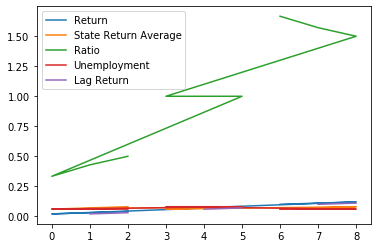

In [27]:
df.plot()

But we can tell it specifically what we want to do. Maybe we want one plot for each company showing only how the company return moves relative to the state average return over time.

In [28]:
df

,Company,State,Date,Return,State Return Average,Ratio,Ratio Size,Unemployment,Lag Return
6,Publix,FL,1/2/2000,0.10,0.06,1.666667,High,0.06,NaN
7,Publix,FL,1/3/2000,0.11,0.07,1.571429,High,0.06,0.10
8,Publix,FL,1/4/2000,0.12,0.08,1.500000,High,0.06,0.11
3,Trader Joes,GA,1/2/2000,0.06,0.06,1.000000,Even,0.08,NaN
4,Trader Joes,GA,1/3/2000,0.07,0.07,1.000000,Even,0.08,0.06
5,Trader Joes,GA,1/4/2000,0.08,0.08,1.000000,Even,0.08,0.07
0,Walmart,FL,1/2/2000,0.02,0.06,0.333333,Low,0.06,NaN
1,Walmart,FL,1/3/2000,0.03,0.07,0.428571,Low,0.06,0.02
2,Walmart,FL,1/4/2000,0.04,0.08,0.500000,Low,0.06,0.03


Company
Publix         AxesSubplot(0.125,0.125;0.775x0.755)
Trader Joes    AxesSubplot(0.125,0.125;0.775x0.755)
Walmart        AxesSubplot(0.125,0.125;0.775x0.755)
dtype: object

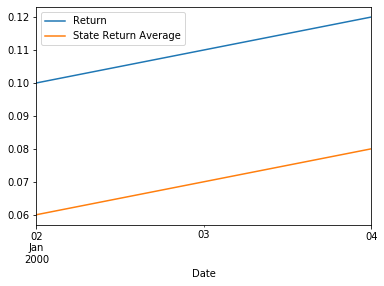

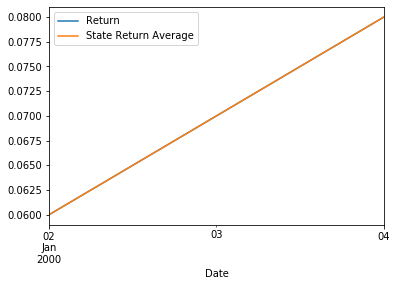

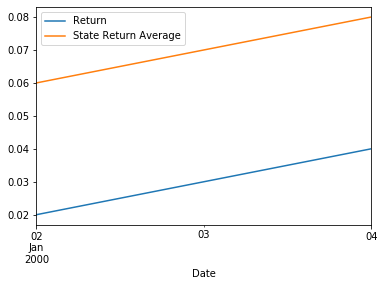

In [29]:
df['Date'] = pd.to_datetime(df['Date']) # convert date from string type to datetime type
df.groupby('Company').plot(y=['Return', 'State Return Average'], x='Date')

`pandas` exposes most of the plots in `matplotlib`. Supported types include:
 - ‘line’ : line plot (default)
 - ‘bar’ : vertical bar plot
 - ‘barh’ : horizontal bar plot
 - ‘hist’ : histogram
 - ‘box’ : boxplot
 - ‘kde’ : Kernel Density Estimation plot
 - ‘density’ : same as ‘kde’
 - ‘area’ : area plot
 - ‘pie’ : pie plot
 - ‘scatter’ : scatter plot
 - ‘hexbin’ : hexbin plot

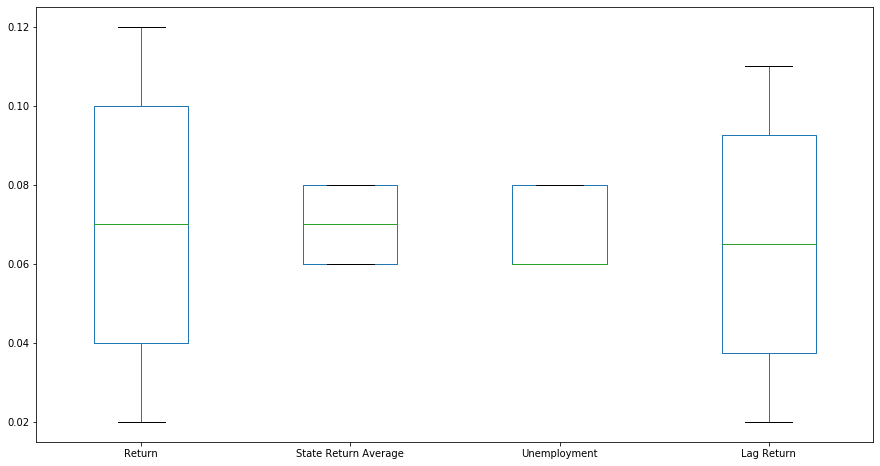

In [30]:
df.drop('Ratio', axis=1).plot(kind='box', figsize=(15,8))

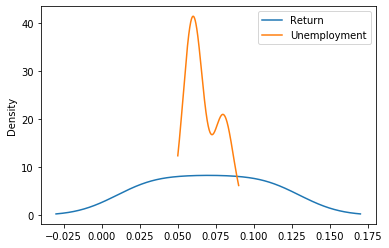

In [31]:
df.plot(y=['Return', 'Unemployment'], kind='kde')

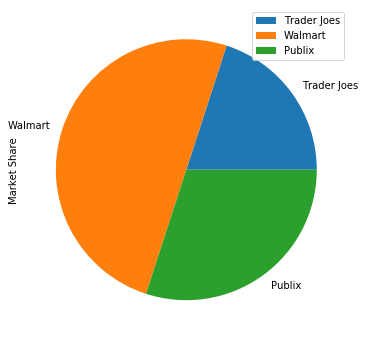

In [32]:
market_share_df = pd.DataFrame(
    data=[
        ('Trader Joes', .2),
        ('Walmart', .5),
        ('Publix', .3)
    ],
    columns=['Company', 'Market Share']
).set_index('Company')
market_share_df.plot(y='Market Share', kind='pie', figsize=(6,6))

Check out <a href=https://seaborn.pydata.org/>the `seaborn` package</a> for some cool high level plotting capabilities.

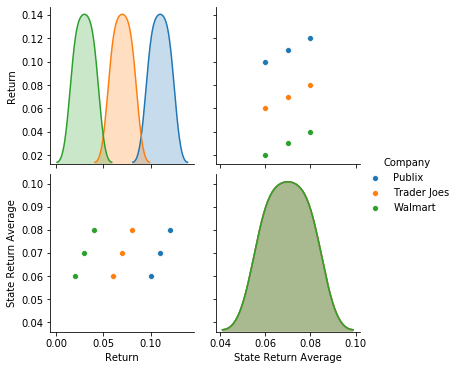

In [33]:
import seaborn as sns # convention for importing seaborn
sns.pairplot(df[['Company', 'Return', 'State Return Average']], hue='Company')

### Regressions

Alright, we've got some cleaned up data. Now we can run regressions on them with the `statsmodels` module. Here I will show the "formula" approach to `statsmodels`, which is just one of the two main interfaces. The `formula` approach will feel similar to specifying a regression in `R` or `Stata`. However we can also directly pass `DataFrames` containing the y and x variables rather than specifying a formula.

In [34]:
df

,Company,State,Date,Return,State Return Average,Ratio,Ratio Size,Unemployment,Lag Return
6,Publix,FL,2000-01-02,0.10,0.06,1.666667,High,0.06,NaN
7,Publix,FL,2000-01-03,0.11,0.07,1.571429,High,0.06,0.10
8,Publix,FL,2000-01-04,0.12,0.08,1.500000,High,0.06,0.11
3,Trader Joes,GA,2000-01-02,0.06,0.06,1.000000,Even,0.08,NaN
4,Trader Joes,GA,2000-01-03,0.07,0.07,1.000000,Even,0.08,0.06
5,Trader Joes,GA,2000-01-04,0.08,0.08,1.000000,Even,0.08,0.07
0,Walmart,FL,2000-01-02,0.02,0.06,0.333333,Low,0.06,NaN
1,Walmart,FL,2000-01-03,0.03,0.07,0.428571,Low,0.06,0.02
2,Walmart,FL,2000-01-04,0.04,0.08,0.500000,Low,0.06,0.03


In [35]:
import statsmodels.formula.api as smf # convention for importing statsmodels

model = smf.ols(formula="Return ~ Unemployment", data=df)
result = model.fit()
result.summary()

/home/nick/.local/share/virtualenvs/py-research-workflows-LM8cXNcD/lib/python3.7/site-packages/scipy/stats/stats.py:1535: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=9
  "anyway, n=%i" % int(n))


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Return   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.143
Method:                 Least Squares   F-statistic:                     0.000
Date:                Mon, 17 Feb 2020   Prob (F-statistic):               1.00
Time:                        08:33:49   Log-Likelihood:                 17.751
No. Observations:                   9   AIC:                            -31.50
Df Residuals:                       7   BIC:                            -31.11
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        0.0700      0.091      0.770      0.466      -0.145       0.285
Unemployment  4.441e-16      1.350   3.29e-16      1.000      -3.191       3.191
==============================================================================
Omnibus:                        1.292   Durbin-Watson:                   0.765
Prob(Omnibus):                  0.524   Jarque-Bera (JB):                0.667
Skew:                           0.000   Prob(JB):                        0.716
Kurtosis:                       1.666   Cond. No.                         107.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Looks like a regression summary should. We can also use fixed effects and interaction terms. Here showing fixed effects:

In [36]:
df.rename(columns={'Ratio Size': 'ratio_size'}, inplace=True) # statsmodels formula doesn't like spaces in column names
model2 = smf.ols(formula="Return ~ Unemployment + C(ratio_size)", data=df)
result2 = model2.fit()
result2.summary()

/home/nick/.local/share/virtualenvs/py-research-workflows-LM8cXNcD/lib/python3.7/site-packages/statsmodels/regression/linear_model.py:1827: RuntimeWarning: divide by zero encountered in double_scalars
  return np.sqrt(eigvals[0]/eigvals[-1])


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Return   R-squared:                       0.941
Model:                            OLS   Adj. R-squared:                  0.922
Method:                 Least Squares   F-statistic:                     48.00
Date:                Mon, 17 Feb 2020   Prob (F-statistic):           0.000204
Time:                        08:33:49   Log-Likelihood:                 30.501
No. Observations:                   9   AIC:                            -55.00
Df Residuals:                       6   BIC:                            -54.41
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept                 0.0696      0.006     12.163      0.000       0.056       0.084
C(ratio_size)[T.High]     0.0401      0.008      4.919      0.003       0.020       0.060
C(ratio_size)[T.Low]     -0.0399      0.008     -4.892      0.003      -0.060      -0.020
Unemployment              0.0056      0.001      7.867      0.000       0.004       0.007
==============================================================================
Omnibus:                        2.380   Durbin-Watson:                   2.333
Prob(Omnibus):                  0.304   Jarque-Bera (JB):                0.844
Skew:                          -0.000   Prob(JB):                        0.656
Kurtosis:                       1.500   Cond. No.                          inf
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is      0. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

Now interaction terms

In [37]:
# use * for interaction keeping individual variables, : for only interaction 
model3 = smf.ols(formula="Return ~ Unemployment*Ratio", data=df) 
result3 = model3.fit()
result3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Return   R-squared:                       0.928
Model:                            OLS   Adj. R-squared:                  0.904
Method:                 Least Squares   F-statistic:                     38.83
Date:                Mon, 17 Feb 2020   Prob (F-statistic):           0.000369
Time:                        08:33:49   Log-Likelihood:                 29.609
No. Observations:                   9   AIC:                            -53.22
Df Residuals:                       6   BIC:                            -52.63
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept              0.0020      0.017      0.121      0.907      -0.039       0.043
Unemployment          -0.0020      0.195     -0.010      0.992      -0.479       0.475
Ratio                  0.0680      0.014      4.849      0.003       0.034       0.102
Unemployment:Ratio     0.0020      0.195      0.010      0.992      -0.476       0.480
==============================================================================
Omnibus:                        0.037   Durbin-Watson:                   2.212
Prob(Omnibus):                  0.982   Jarque-Bera (JB):                0.148
Skew:                           0.057   Prob(JB):                        0.929
Kurtosis:                       2.383   Cond. No.                     1.25e+17
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.23e-33. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

Want to throw together these models into one summary table?

In [38]:
from statsmodels.iolib.summary2 import summary_col

reg_list = [result, result2, result3]
summ = summary_col(
    reg_list,
    stars=True,
    info_dict = {
        'N': lambda x: "{0:d}".format(int(x.nobs)),
        'Adj-R2': lambda x: "{:.2f}".format(x.rsquared_adj)
    }
)
summ

,Return I,Return II,Return III
C(ratio_size)[T.High],,0.0401***,
,,(0.0082),
C(ratio_size)[T.Low],,-0.0399***,
,,(0.0082),
Intercept,0.0700,0.0696***,0.0020
,(0.0909),(0.0057),(0.0167)
R-squared,-0.1429,0.9216,0.9044
,0.0000,0.9412,0.9283
Ratio,,,0.0680***
,,,(0.0140)


On the backend, `statsmodels`' `summary_col` uses a `DataFrame` which we can access as:

In [39]:
summ.tables[0]

,Return I,Return II,Return III
C(ratio_size)[T.High],,0.0401***,
,,(0.0082),
C(ratio_size)[T.Low],,-0.0399***,
,,(0.0082),
Intercept,0.0700,0.0696***,0.0020
,(0.0909),(0.0057),(0.0167)
R-squared,-0.1429,0.9216,0.9044
,0.0000,0.9412,0.9283
Ratio,,,0.0680***
,,,(0.0140)


Therefore we can write functions to do any cleanup we want on the summary, leveraging `pandas`:

In [40]:
def replace_fixed_effects_cols(df):
    """
    hackish way to do this just for example
    """
    out_df = df.iloc[4:] #remove fixed effect dummy rows
    out_df.loc['Ratio Size Fixed Effects'] = ('No', 'Yes', 'No')
    return out_df

clean_summ = replace_fixed_effects_cols(summ.tables[0])
clean_summ

/home/nick/.local/share/virtualenvs/py-research-workflows-LM8cXNcD/lib/python3.7/site-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


,Return I,Return II,Return III
Intercept,0.0700,0.0696***,0.0020
,(0.0909),(0.0057),(0.0167)
R-squared,-0.1429,0.9216,0.9044
,0.0000,0.9412,0.9283
Ratio,,,0.0680***
,,,(0.0140)
Unemployment,0.0000,0.0056***,-0.0020
,(1.3496),(0.0007),(0.1951)
Unemployment:Ratio,,,0.0020
,,,(0.1953)


Pretty cool, right? Since it's a `DataFrame`, we can even output it to LaTeX:

In [41]:
clean_summ.to_latex()

'\\begin{tabular}{llll}\n\\toprule\n{} &  Return I &  Return II & Return III \\\\\n\\midrule\nIntercept                &    0.0700 &  0.0696*** &     0.0020 \\\\\n                         &  (0.0909) &   (0.0057) &   (0.0167) \\\\\nR-squared                &   -0.1429 &     0.9216 &     0.9044 \\\\\n                         &    0.0000 &     0.9412 &     0.9283 \\\\\nRatio                    &           &            &  0.0680*** \\\\\n                         &           &            &   (0.0140) \\\\\nUnemployment             &    0.0000 &  0.0056*** &    -0.0020 \\\\\n                         &  (1.3496) &   (0.0007) &   (0.1951) \\\\\nUnemployment:Ratio       &           &            &     0.0020 \\\\\n                         &           &            &   (0.1953) \\\\\nN                        &         9 &          9 &          9 \\\\\nAdj-R2                   &     -0.14 &       0.92 &       0.90 \\\\\nRatio Size Fixed Effects &        No &        Yes &         No \\\\\n\\bottomr

Looks messy here, but you can output it to a file. However it's only outputting the direct LaTeX for the table so we can add a wrapper so it will compile as document:

In [42]:
def _latex_text_wrapper(text):
    begin_text = r"""
    \documentclass[12pt]{article}
\usepackage{booktabs}
\begin{document}

\begin{table}

    """
    
    end_text = r"""
    
    \end{table}
\end{document}
    """
    
    return begin_text + text + end_text

def to_latex(df, filepath='temp.tex'):
    latex = df.to_latex()
    full_latex = _latex_text_wrapper(latex)
    with open(filepath, 'w') as f:
        f.write(full_latex)
        
to_latex(clean_summ) # created temp.tex in this folder. Go look and try to compile

### Input and Output

Let's output our existing `DataFrame` to some different formats and then show it can be loaded in through those formats as well.

In [43]:
# We are not using the index, so don't write it to file
df.to_csv('temp.csv', index=False)
df.to_excel('temp.xlsx', index=False)
df.to_stata('temp.dta', write_index=False)
# NOTE: it is possible to read from SAS7BDAT but not write to it

/home/nick/.local/share/virtualenvs/py-research-workflows-LM8cXNcD/lib/python3.7/site-packages/pandas/io/stata.py:2252: InvalidColumnName: 
Not all pandas column names were valid Stata variable names.
The following replacements have been made:

    b'State Return Average'   ->   State_Return_Average
    b'Lag Return'   ->   Lag_Return

If this is not what you expect, please make sure you have Stata-compliant
column names in your DataFrame (strings only, max 32 characters, only
alphanumerics and underscores, no Stata reserved words)

  warnings.warn(ws, InvalidColumnName)


In [44]:
pd.read_csv('temp.csv')

,Company,State,Date,Return,State Return Average,Ratio,ratio_size,Unemployment,Lag Return
0,Publix,FL,2000-01-02,0.10,0.06,1.666667,High,0.06,NaN
1,Publix,FL,2000-01-03,0.11,0.07,1.571429,High,0.06,0.10
2,Publix,FL,2000-01-04,0.12,0.08,1.500000,High,0.06,0.11
3,Trader Joes,GA,2000-01-02,0.06,0.06,1.000000,Even,0.08,NaN
4,Trader Joes,GA,2000-01-03,0.07,0.07,1.000000,Even,0.08,0.06
5,Trader Joes,GA,2000-01-04,0.08,0.08,1.000000,Even,0.08,0.07
6,Walmart,FL,2000-01-02,0.02,0.06,0.333333,Low,0.06,NaN
7,Walmart,FL,2000-01-03,0.03,0.07,0.428571,Low,0.06,0.02
8,Walmart,FL,2000-01-04,0.04,0.08,0.500000,Low,0.06,0.03


In [45]:
pd.read_excel('temp.xlsx')

,Company,State,Date,Return,State Return Average,Ratio,ratio_size,Unemployment,Lag Return
0,Publix,FL,2000-01-02,0.10,0.06,1.666667,High,0.06,NaN
1,Publix,FL,2000-01-03,0.11,0.07,1.571429,High,0.06,0.10
2,Publix,FL,2000-01-04,0.12,0.08,1.500000,High,0.06,0.11
3,Trader Joes,GA,2000-01-02,0.06,0.06,1.000000,Even,0.08,NaN
4,Trader Joes,GA,2000-01-03,0.07,0.07,1.000000,Even,0.08,0.06
5,Trader Joes,GA,2000-01-04,0.08,0.08,1.000000,Even,0.08,0.07
6,Walmart,FL,2000-01-02,0.02,0.06,0.333333,Low,0.06,NaN
7,Walmart,FL,2000-01-03,0.03,0.07,0.428571,Low,0.06,0.02
8,Walmart,FL,2000-01-04,0.04,0.08,0.500000,Low,0.06,0.03


In [46]:
pd.read_stata('temp.dta')

,Company,State,Date,Return,State_Return_Average,Ratio,ratio_size,Unemployment,Lag_Return
0,Publix,FL,2000-01-02,0.10,0.06,1.666667,High,0.06,NaN
1,Publix,FL,2000-01-03,0.11,0.07,1.571429,High,0.06,0.10
2,Publix,FL,2000-01-04,0.12,0.08,1.500000,High,0.06,0.11
3,Trader Joes,GA,2000-01-02,0.06,0.06,1.000000,Even,0.08,NaN
4,Trader Joes,GA,2000-01-03,0.07,0.07,1.000000,Even,0.08,0.06
5,Trader Joes,GA,2000-01-04,0.08,0.08,1.000000,Even,0.08,0.07
6,Walmart,FL,2000-01-02,0.02,0.06,0.333333,Low,0.06,NaN
7,Walmart,FL,2000-01-03,0.03,0.07,0.428571,Low,0.06,0.02
8,Walmart,FL,2000-01-04,0.04,0.08,0.500000,Low,0.06,0.03


In [47]:
# pd.read_sas('temp.sas7bdat') #doesn't exist because we couldn't write to it. But if you already have sas data this will work

### Some Clean Up

This section is not important, just cleaning up the temporary files we just generated.

In [48]:
import os

clean_files = [
    'temp.csv',
    'temp.xlsx',
    'temp.dta',
    'temp.tex',
]

for file in clean_files:
    os.remove(file)